# Single Layer Neural Network from Scratch

In [194]:
import util_mnist_reader
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [195]:
# Read Fashion MNIST dataset
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

In [196]:
# convert y array to matrix
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)

In [197]:
# Normalization of Data
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [198]:
# defining sigmoid, sigmoid derivative, softmax and cross entropy functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=0)).T
    
def cross_entropy(output, y_target):
    return -np.sum(np.log(output) * y_target, axis=0)

In [199]:
# forward and backward propagation
def forward(X):
    X_input = X.copy()
    z1 = np.dot(w1, X_input.T) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    global a2
    a2 = softmax(z2)
    return X_input, z1, a1, z2, a2

def backward(X_input, z1, a1, a2, y):
    da2 = a2 - y
    dz1 = np.dot(w2.T, da2)
    da1 = dz1 * sigmoid_derivative(z1)
    
    da1_m = da1.reshape(da1.shape[0], 1)
    da2_m = da2.reshape(da2.shape[0], 1)
    X_inputm = X_input.reshape(X_input.shape[0], 1)
    a1_m = a1.reshape(a1.shape[0], 1)
    
    w_grad1 = np.dot(da1_m, X_inputm.T)
    w_grad2 = np.dot(da2_m, a1_m.T)
    
    b_grad1 = np.sum(da1_m.T, axis=1)
    b_grad2 = np.sum(da2_m.T, axis=1)
    
    return w_grad1, w_grad2, b_grad1, b_grad2

def backprop_step(X, y):
        X_input, z1, a1, z2, a2 = forward(X)
        y = y.T
        w_grad1, w_grad2, b_grad1, b_grad2 = backward(X_input, z1, a1, a2, y)
        error = cross_entropy(a2, y)
        return error, w_grad1, w_grad2, b_grad1, b_grad2

In [202]:
# converting predicted values from continuous to binary
def y_predict (X):
    pred = []
    for i in range (len(X)): 
        X_input, z1, a1, z2, a2 = forward(X[i])
        pred.append(a2.argmax())
    return pred

# defining function for accuracy
def acc_score (X, y):
    acc = 0
    for i in range (len(X)):
        X_input, z1, a1, z2, a2 = forward(X[i])
        if a2.argmax() == y[i].argmax():
            acc += 1
    return float(acc)/len(X)

In [290]:
# Hyperparameters
epochs = 30
nodes = 8
learning_rate = 0.001

In [291]:
# initialize weights and biases
w1 = np.random.randn(nodes, 784) * 0.01
w2 = np.random.randn(10, nodes) * 0.01
b1 = np.zeros((nodes, ))
b2 = np.zeros((10, ))

In [292]:
# training the model

losstrack_train = []
losstrack_val = []
for i in range(epochs):
    epoch_errors_train = []
    epoch_errors_val = []
    for j in range (len(X_train)):
        # updating weights
        error_t, w_grad1, w_grad2, b_grad1, b_grad2 = backprop_step(X_train[j], y_train[j])
        epoch_errors_train.append(error_t)
        w1 -= learning_rate * w_grad1
        w2 -= learning_rate * w_grad2
        b1 -= learning_rate * b_grad1
        b2 -= learning_rate * b_grad2
        
    for k in range (len(X_test)):
        error_v, w_grad1, w_grad2, b_grad1, b_grad2 = backprop_step(X_test[k], y_test[k])
        epoch_errors_val.append(error_v)
    losstrack_train.append(np.mean(epoch_errors_train))
    losstrack_val.append(np.mean(epoch_errors_val))

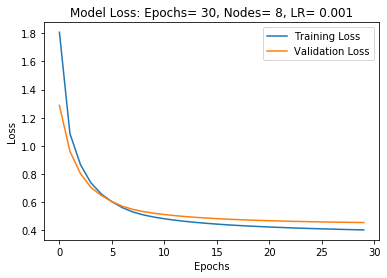

In [294]:
# plotting loss vs epochs curves
loss_train = plt.plot(losstrack_train, label = 'Training Loss')
loss_val = plt.plot(losstrack_val, label = 'Validation Loss')
plt.title('Model Loss: Epochs= 30, Nodes= 8, LR= 0.001')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [295]:
# calculating accuracy
print ('Training Accuracy:', acc_score(X_train, y_train))
print ('Test Accuracy:', acc_score(X_test, y_test))

# developing confusion matrix   
cm_train = confusion_matrix(Y_train, y_predict(X_train))
cm_test = confusion_matrix(Y_test, y_predict(X_test))

print ('\nTraining Confusion Matrix:\n\n', cm_train)
print ('\n\nTest Confusion Matrix:\n\n', cm_test)

Training Accuracy: 0.8629166666666667
Test Accuracy: 0.8427

Training Confusion Matrix:

 [[4968   46   66  350   18   11  483    0   57    1]
 [  14 5800   25  137    5    3   14    1    1    0]
 [  66   12 4420   65  893    2  519    1   22    0]
 [ 153   82   39 5457  132    0  125    0   12    0]
 [   7    8  369  301 4973    0  329    0   13    0]
 [   3    0    0    4    0 5631    4  245   18   95]
 [ 954   15  640  250  658    1 3397    1   83    1]
 [   0    0    0    0    0  142    1 5693   14  150]
 [  20    3   26   46   23   21   87   30 5741    3]
 [   1    0    0    2    1   56    1  243    1 5695]]


Test Confusion Matrix:

 [[809   5  10  57   4   2 100   0  13   0]
 [  2 952   5  30   5   0   5   0   1   0]
 [ 20   2 712  14 166   1  80   0   5   0]
 [ 22  17   5 882  33   1  37   0   3   0]
 [  0   2  89  48 795   0  60   0   6   0]
 [  0   0   0   1   0 913   0  50   3  33]
 [154   2 112  56 121   0 528   0  27   0]
 [  0   0   0   0   0  27   0 951   0  22]
 [  3   

# Multi-Layer Neural Network

In [296]:
import util_mnist_reader
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
from keras import callbacks

In [297]:
# Read Fashion MNIST dataset
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

In [299]:
# convert y array to matrix
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)

In [300]:
# Normalization of Data
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [301]:
# convert predicted values from continuous to binary
def y_predict (X, a):
    pred = []
    for i in range (len(X)): 
        pred.append(a[i].argmax())
    return pred

In [310]:
# training the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=500)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/step - loss: 2.1351 - categorical_accuracy: 0.2965 - val_loss: 1.6870 - val_categorical_accuracy: 0.4413
Epoch 2/50
60000/60000 [=========================

60000/60000 [==============================] - 2s 34us/step - loss: 0.2951 - categorical_accuracy: 0.8918 - val_loss: 0.3635 - val_categorical_accuracy: 0.8728
Epoch 44/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2947 - categorical_accuracy: 0.8918 - val_loss: 0.3728 - val_categorical_accuracy: 0.8651
Epoch 45/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2914 - categorical_accuracy: 0.8934 - val_loss: 0.3772 - val_categorical_accuracy: 0.8635
Epoch 46/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2907 - categorical_accuracy: 0.8938 - val_loss: 0.3854 - val_categorical_accuracy: 0.8622
Epoch 47/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.2921 - categorical_accuracy: 0.8935 - val_loss: 0.3975 - val_categorical_accuracy: 0.8538
Epoch 48/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2865 - categorical_accuracy: 0.8953 - val_loss: 0.3607 - val_categoric

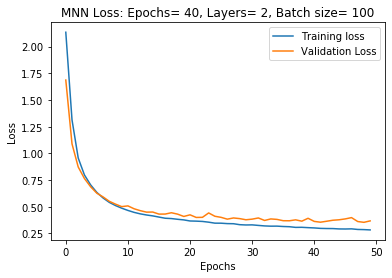

In [311]:
# plotting loss vs epochs curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MNN Loss: Epochs= 40, Layers= 2, Batch size= 100')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

In [312]:
# calculating accuracy
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=500)
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=500)

print ('\nTraining Accuracy:', train_acc)
print ('Test Accuracy:', test_acc)

# developing confusion matrix
a2_train = model.predict(X_train, batch_size=500)
a2_test = model.predict(X_test, batch_size=500)

cm_train = confusion_matrix(Y_train, y_predict(X_train, a2_train))
cm_test = confusion_matrix(Y_test, y_predict(X_test, a2_test))

print ('\nTraining Confusion Matrix:\n\n', cm_train)
print ('\n\nTest Confusion Matrix:\n\n', cm_test)

10000/10000 [==============================] - 1s 54us/step

Training Accuracy: 0.89575
Test Accuracy: 0.8688

Training Confusion Matrix:

 [[5275    7  116  108    7    1  458    0   28    0]
 [  14 5888   11   71    4    2   10    0    0    0]
 [  43    2 5363   36  317    0  225    0   14    0]
 [ 181   44   54 5437  180    0   91    0   13    0]
 [   8    5  802  151 4758    0  266    0   10    0]
 [   0    0    1    0    0 5931    1   43    6   18]
 [ 814    5  680   97  354    1 4024    0   25    0]
 [   0    0    0    0    0  316    0 5280    5  399]
 [   7    0   27   19   17   16   35    7 5870    2]
 [   0    0    0    0    0   37    0   43    1 5919]]


Test Confusion Matrix:

 [[845   2  21  24   3   1  96   0   8   0]
 [  4 962   4  25   2   0   3   0   0   0]
 [ 14   0 865   9  62   0  48   0   2   0]
 [ 27  11  17 877  36   1  26   0   5   0]
 [  0   1 164  28 753   0  53   0   1   0]
 [  0   1   0   0   0 965   0  12   2  20]
 [150   0 136  26  66   1 613   0   8   0]
 

# Convolutional Neural Network

In [313]:
import util_mnist_reader
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import callbacks

In [314]:
# Read Fashion MNIST dataset
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

In [315]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [316]:
# convert predicted values from continuous to binary
def y_predict (X, a):
    pred = []
    for i in range (len(X)): 
        pred.append(a[i].argmax())
    return pred

In [319]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3699 - acc: 0.1051 - val_loss: 2.2922 - val_acc: 0.1003
Epoch 2/40
60000/60000 [==============================] - 65s 1ms/step - loss: 2.0631 - acc: 0.3072 - val_loss: 1.3420 - val_acc: 0.5244
Epoch 3/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.9537 - acc: 0.6654 - val_loss: 0.8080 - val_acc: 0.7043
Epoch 4/40
60000/60000 [==============================] - 64s 1ms/step - loss: 0.7349 - acc: 0.7338 - val_loss: 0.7088 - val_acc: 0.7410
Epoch 5/40
60000/60000 [==============================] - 63s 1ms/step - loss: 0.6730 - acc: 0.7491 - val_loss: 0.6719 - val_acc: 0.7540
Epoch 6/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.6294 - acc: 0.7653 - val_loss: 0.6261 - val_acc: 0.7680
Epoch 7/40
60000/60000 [==============================] - 60s 993us/step - loss: 0.5979 - acc: 0.7753 - val_loss: 0.5964 - val_a

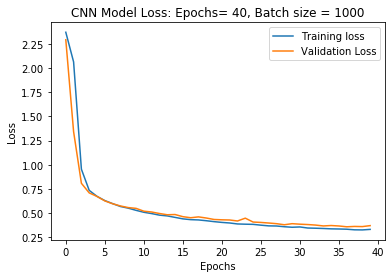

In [320]:
# plotting loss vs epochs curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss: Epochs= 40, Batch size = 1000')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

In [182]:
# calculating accuracy
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTraining Accuracy: ',train_acc)
print('Test accuracy: ',test_acc)

# developing confusion matrix
a2_train = model.predict(X_train, batch_size=64)
a2_test = model.predict(X_test, batch_size=64)

cm_train = confusion_matrix(Y_train, y_predict(X_train, a2_train))
cm_test = confusion_matrix(Y_test, y_predict(X_test, a2_test))

print ('\nTraining Confusion Matrix:\n\n', cm_train)
print ('\n\nTest Confusion Matrix:\n\n', cm_test)

10000/10000 [==============================] - 3s 278us/step

Training Accuracy:  0.8956333333333333
Test accuracy:  0.8839

Training Confusion Matrix:

 [[4960    3   88  143   16    3  771    1   15    0]
 [   6 5889    3   83    5    0    9    0    5    0]
 [  46    6 4816   72  621    2  423    1   13    0]
 [ 110   13   23 5600   88    0  151    1    9    5]
 [   7    6  233  289 5095    0  361    1    8    0]
 [   0    0    0    0    0 5756    0  157    1   86]
 [ 609    8  455  156  547    0 4202    1   21    1]
 [   0    0    0    0    0   24    0 5697    0  279]
 [  15    4   25   11   17   24   53   15 5828    8]
 [   0    0    0    0    0    3    0  102    0 5895]]


Test Confusion Matrix:

 [[806   0  11  21   3   2 149   0   8   0]
 [  1 970   0  22   3   0   3   0   1   0]
 [  8   1 800  12  93   1  84   0   1   0]
 [ 12   1  15 921  13   0  36   0   2   0]
 [  4   1  44  50 837   0  64   0   0   0]
 [  0   0   0   0   0 958   1  30   0  11]
 [107   2  83  30 104   1 663 